# Imports

In [59]:
%config Completer.use_jedi = False
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

# Load Data

## Data Description




Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data

In [60]:
data = pd.read_csv('Mall_Customers.csv')
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

In [61]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [63]:
discrete_features = []
continuous_features = []
for feature in data.columns:
    print(feature, len(data[feature].unique()))
    if len(data[feature].unique()) > 10:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)
        
print()
print('Discrete Features:', discrete_features)
print('Continuous Features:', continuous_features)

Gender 2
Age 51
Annual Income (k$) 64
Spending Score (1-100) 84

Discrete Features: ['Gender']
Continuous Features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


## Observations
- There is no missing values.
- ID column contributes nothing to the dataset so dropped it.
- There is a total of 200 examples or rows in the dataset.
- The data has 1 Discrete and 3 Continuous Features.

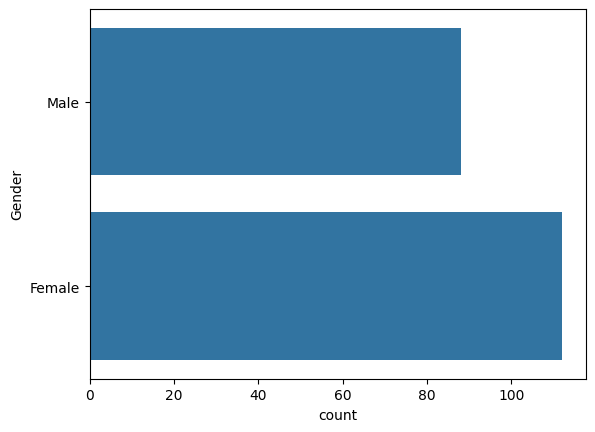

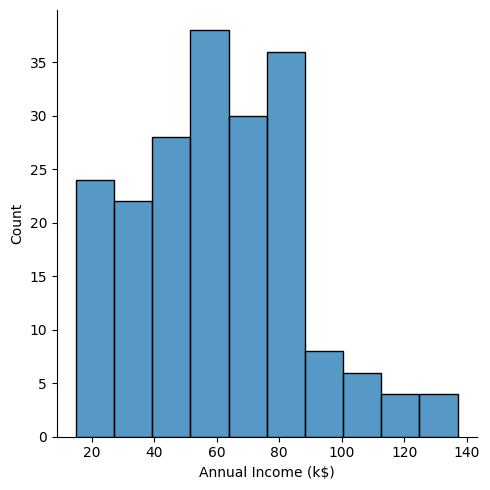

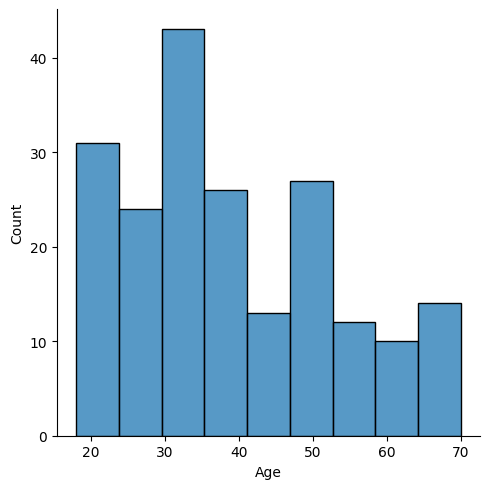

In [64]:
sns.countplot(data['Gender'])
sns.displot(data['Annual Income (k$)'])
sns.displot(data['Age'])

# Feature Engineering

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

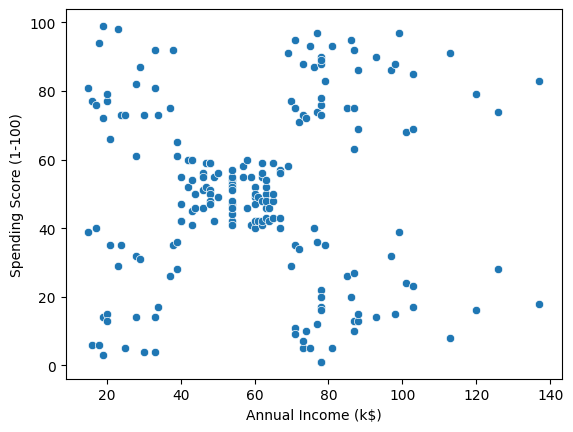

In [65]:
#cluster on 2 features

df1 = data[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1)

# Model Building

## KMeans

Intertia at i = 10 : 20289.564222151814
Silhouette Coefficient: 0.440


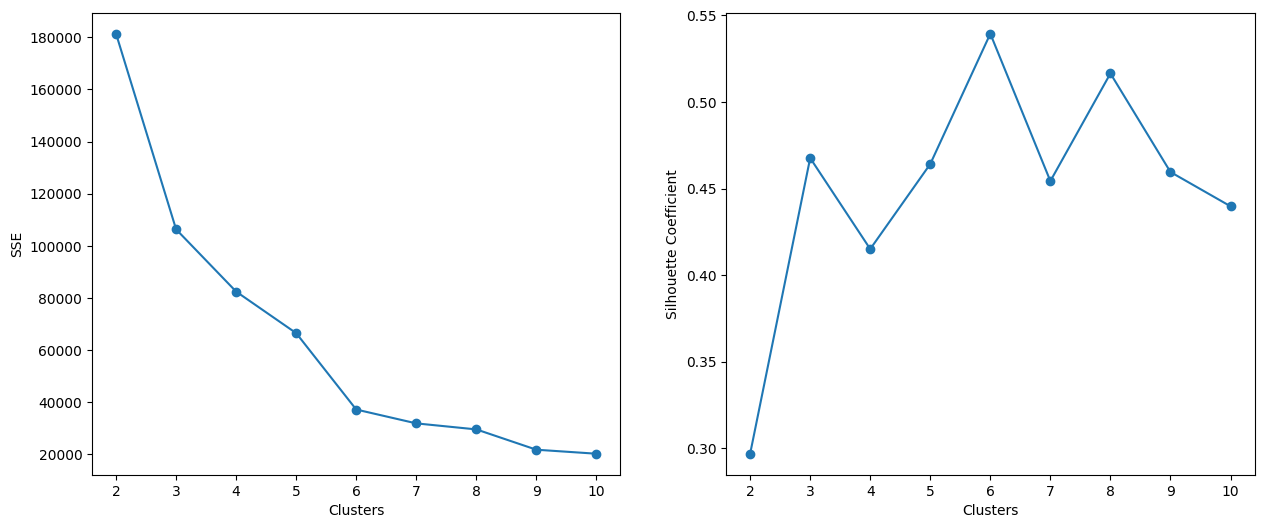

In [66]:
#k menas
error = []#sum of squrw errors
kmean_sil_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1) # Fit the model
    labels = kmeans.predict(df1) # Predict the cluster labels
    error.append(kmeans.inertia_)
    kmean_sil_scores.append(silhouette_score(df1, labels))
    
    clear_output(wait=True)
    print('Intertia at i =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(df1, labels))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(range(2,11), error, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('SSE')

ax[1].plot(range(2,11), kmean_sil_scores, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Silhouette Coefficient')

plt.show()

In [67]:
km = KMeans(n_clusters=6)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5936\1604666800.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


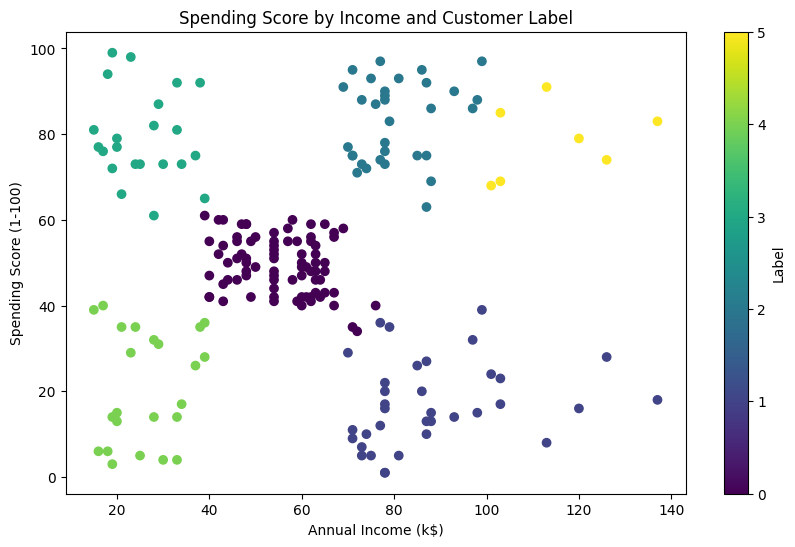

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=df1['Label'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Income and Customer Label')
_ = plt.colorbar(label='Label')

## DBSCAN

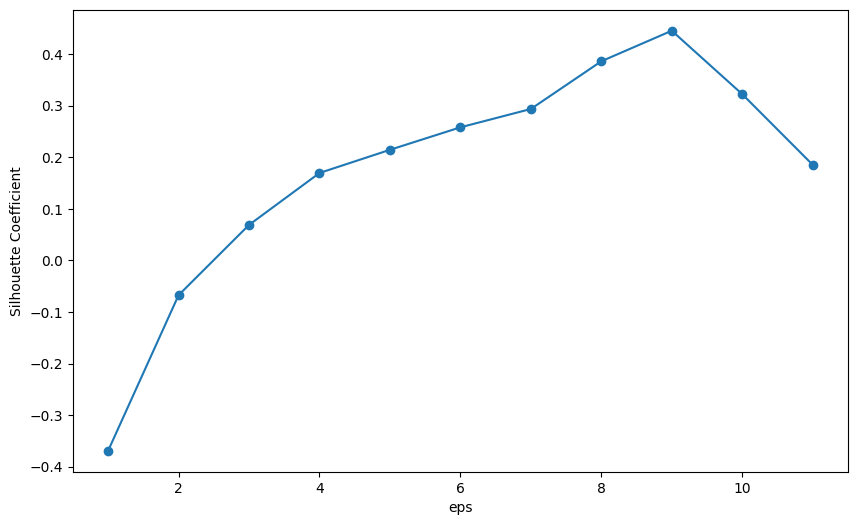

In [69]:
# Import the NumPy library
import numpy as np
from sklearn.cluster import DBSCAN # Import the DBSCAN class

dbscan_sil_scores = []
dbscan_index = np.arange(1, 12)  # Now np.arange is recognized

for i in dbscan_index:
    dbscan = DBSCAN(eps=i, min_samples=2) #Now DBSCAN will be recognized
    labels = dbscan.fit_predict(df1)
    dbscan_sil_scores.append(silhouette_score(df1, labels))

plt.figure(figsize=(10, 6))
plt.plot(dbscan_index, dbscan_sil_scores, marker='o')
plt.xlabel('eps')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [92]:
dbscan = DBSCAN(eps=10, min_samples=2)
dbscan.fit(df1)
y_pred = dbscan.fit_predict(df1)
df1['Label'] = y_pred
df1.head()


C:\Users\User\AppData\Local\Temp\ipykernel_5936\3295648261.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


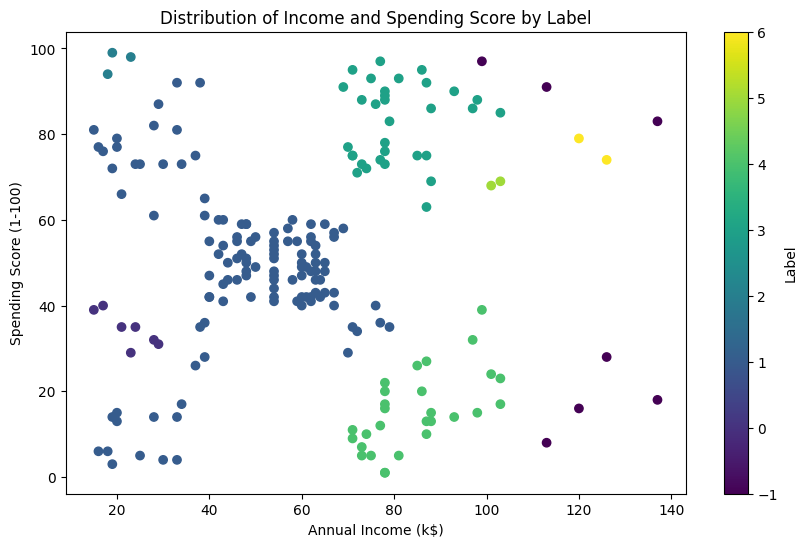

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=df1['Label'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribution of Income and Spending Score by Label')
_ = plt.colorbar(label='Label')

## Best Model ?
With **KMeans at clusters = 5to6** provides high Silhouette score. Also looking at the clusters vs inertia graph, the **elbow method** is applied which interprets the clusters at 5 to 6 look as elbow point.

Considering the **DBSCAN**, different values of eps and min_samples are tried where variable eps are tested with its Silhouette score. At **eps = 8 to 10**, DBSCAN provide a good score.

Thus, my conclusion is either KMeans and DBSCAN can be used at the provided parameters to obtain efficient results.

# Future Scope
- While revisiting the dataset, will try more in-depth analysis of the dataset.
- Will try other clustering algorithms and compare the results.